In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data = pd.read_pickle('../data/raw/commits_new_v3.pickle')

In [3]:
data.head()

,repo_name,commit_message,files_changed,commit_changes,hash
0,pandora,展示模型名追加tags (#951)\n\n原来格式化的结果可能存在同名model的情况，让...,src/pandora/bots/legacy.py,a/src/pandora/bots/legacy.py b/src/pandora/bo...,8f2d776f6a72c9d5973a24ecbea4b5ace8c7338d
1,pandora,Add the missing Docker env: PANDORA_THREADS\n\...,bin/startup.sh,a/bin/startup.sh b/bin/startup.sh\nindex c6eb...,f33d09288498be4921e244d674845170967053b9
2,pandora,Add the missing Docker env: PANDORA_THREADS\n\...,doc/wiki.md,a/doc/wiki.md b/doc/wiki.md\nindex 20330da..6...,f33d09288498be4921e244d674845170967053b9
3,pandora,Add the missing Docker env: PANDORA_THREADS\n\...,doc/wiki_en.md,a/doc/wiki_en.md b/doc/wiki_en.md\nindex 2f93...,f33d09288498be4921e244d674845170967053b9
4,pandora,Add the missing Docker env: PANDORA_THREADS\n\...,src/pandora/__init__.py,a/src/pandora/__init__.py b/src/pandora/__ini...,f33d09288498be4921e244d674845170967053b9


In [4]:
print(data["commit_changes"][41])

 a/README.md b/README.md
index 6936c59..0730988 100644
--- a/README.md
+++ b/README.md
@@ -45,7 +45,7 @@
 ### &nbsp;&nbsp;&nbsp;吃着火锅唱着歌，突然就出故障了。痛！
 ![t4](https://github.com/pengzhile/pandora/raw/master/doc/images/t4.png)
 
-### 6. 手机和电脑的模型不同用，顾这个就顾不到那个，痛！
+### 6. 手机和电脑的模型不通用，顾这个就顾不到那个，痛！
 ![t7](https://github.com/pengzhile/pandora/raw/master/doc/images/t7.png)
 
 ### 7. 蹦字慢吞吞，卡顿不流畅，不知道的甚至想换电脑。痛！


In [5]:
data.shape  # 2152264 before

(1174385, 5)

In [6]:
changes_lengths = []
for change in data['commit_changes']:
    changes_lengths.append(len(change))

In [7]:
max_len = max(changes_lengths)

In [8]:
changes_lengths = np.array(changes_lengths)

In [9]:
counts, bins = np.histogram(changes_lengths, bins=100)

In [10]:
percentile = np.percentile(changes_lengths, 85)
changes_lengths_percentile = changes_lengths[changes_lengths < percentile]
percentile

6194.0

In [11]:
changes_lengths_percentile.shape

(998222,)

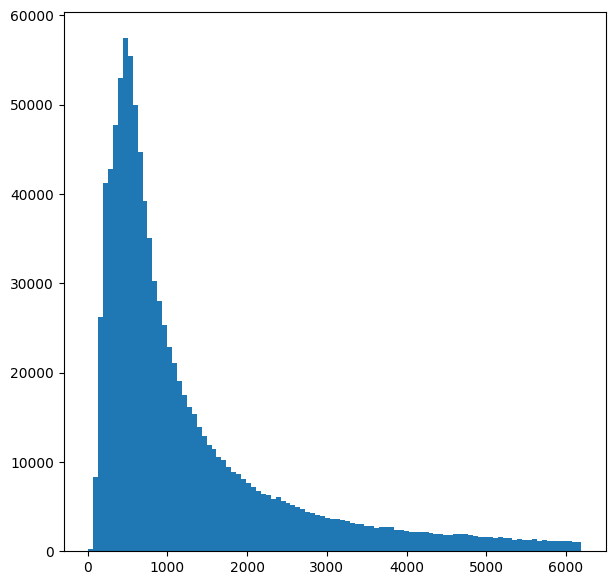

In [12]:
# length of commit changes
plt.figure(figsize=(7, 7))
plt.hist(changes_lengths_percentile, bins=100)
plt.show()

In [13]:
random_num = np.random.randint(0, data.shape[0])
random_msg = data.iloc[random_num]['commit_message']
print(random_msg)

Gave more power to the TelegramClients and bug fixes

Fixed uploads for large files on TcpClient
Added more RPCError's for handling invalid phone code
Added more media handlers: now you're also able to
  both send and download documents!
The InteractiveTelegramClient now supports working
  with media aswell



In [14]:
# regexp to detect non-ascii characters
non_ascii = re.compile(r'[^\x00-\x7F]+')

non_ascii_commits = data[data['commit_message'].str.contains(non_ascii)]

In [15]:
non_ascii_commits.shape

(36971, 5)

In [16]:
number_of_commits = data.groupby('repo_name').count().sort_values(by='commit_message', ascending=False)[
    'commit_message']

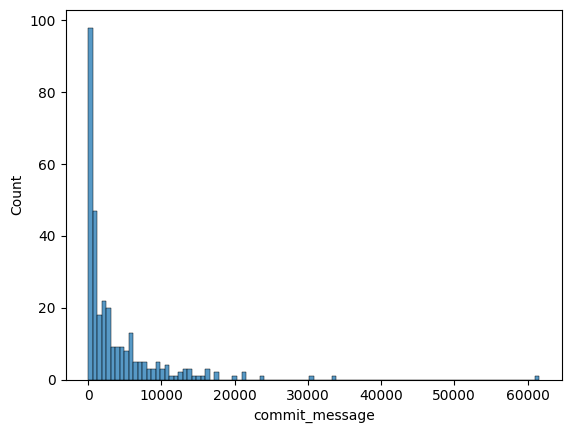

In [17]:
# number of files changed in all commits
sns.histplot(number_of_commits, bins=100)
plt.show()

In [19]:
cleaned_data = data.copy()
cleaned_data.head()

,repo_name,commit_message,files_changed,commit_changes,hash
0,pandora,展示模型名追加tags (#951)\n\n原来格式化的结果可能存在同名model的情况，让...,src/pandora/bots/legacy.py,a/src/pandora/bots/legacy.py b/src/pandora/bo...,8f2d776f6a72c9d5973a24ecbea4b5ace8c7338d
1,pandora,Add the missing Docker env: PANDORA_THREADS\n\...,bin/startup.sh,a/bin/startup.sh b/bin/startup.sh\nindex c6eb...,f33d09288498be4921e244d674845170967053b9
2,pandora,Add the missing Docker env: PANDORA_THREADS\n\...,doc/wiki.md,a/doc/wiki.md b/doc/wiki.md\nindex 20330da..6...,f33d09288498be4921e244d674845170967053b9
3,pandora,Add the missing Docker env: PANDORA_THREADS\n\...,doc/wiki_en.md,a/doc/wiki_en.md b/doc/wiki_en.md\nindex 2f93...,f33d09288498be4921e244d674845170967053b9
4,pandora,Add the missing Docker env: PANDORA_THREADS\n\...,src/pandora/__init__.py,a/src/pandora/__init__.py b/src/pandora/__ini...,f33d09288498be4921e244d674845170967053b9


In [20]:
#remove data samples with non-ascii characters
cleaned_data = cleaned_data.drop(non_ascii_commits.index)

In [21]:
cleaned_data.groupby('repo_name').count().sort_values(by='commit_message', ascending=False)['commit_message']

repo_name
Github-Ranking             61580
hosts                      33339
PaddleSpeech               30035
PaddleNLP                  22964
gensim                     21192
                           ...  
jumpcutter                    23
TikTokDownload                21
Awesome-PyTorch-Chinese       15
uncaptcha2                     9
ECDICT                         7
Name: commit_message, Length: 311, dtype: int64

In [22]:
#remove Github-Ranking
cleaned_data = cleaned_data[cleaned_data['repo_name'] != 'Github-Ranking']

In [23]:
#remove samples with len of the changes > 6k characters
cleaned_data = cleaned_data[cleaned_data['commit_changes'].apply(lambda x: len(x)) <= 6000]

In [24]:
commit_msg_len = cleaned_data['commit_message'].apply(lambda x: len(x))
commit_msg_len = np.array(commit_msg_len)

In [25]:
print(cleaned_data[cleaned_data['commit_message'].apply(lambda x: len(x)) == max(commit_msg_len)].iloc[0]['commit_message'])

Enabling SST2 dataset usage in fbcode (#1426)

* include pytorch 1.5.0-rc1 for CI test

* bump up the version

* Set up ShipIt

fbshipit-source-id: bb7d2eb52240c7223b57c3c9624e61d116e77e39

* Re-sync with internal repository (#749)

* 20200429 pytorch/text import

Summary: [20:45:34: cpuhrsch@devvm3140 pytorch]$ ./fb_build/import_text.sh

Reviewed By: pbelevich

Differential Revision: D21320577

fbshipit-source-id: ac2148b9f0d58e5538443c879845bfb4f6ca7202

* 20200430 torchtext import script to include additional meta files

Summary: ./fb_build/import_text.sh

Reviewed By: zhangguanheng66

Differential Revision: D21343124

fbshipit-source-id: c08ecad2cc6f439fa40130aeaf91383be9403fe8

* torchtext flake8, github, travis metafiles

Summary: See title

Reviewed By: pbelevich

Differential Revision: D21344211

fbshipit-source-id: a8bcf7f3ab9bb2c2853e27f612e82caa341d3651

* Import torchtext 20200520 and update build

Summary: Import torchtext up to #786

Reviewed By: cpuhrsch

Differential Re

In [26]:
# remove samples with to big commit messages
commit_msg_len_boundary = np.percentile(commit_msg_len, 98)

In [27]:
commit_msg_len_boundary

947.0

In [28]:
cleaned_data = cleaned_data[cleaned_data['commit_message'].apply(lambda x: len(x)) <= commit_msg_len_boundary]

In [29]:
cleaned_data.shape

(941815, 5)

In [30]:
def print_data_sample(n):
    print(cleaned_data.iloc[n].commit_changes)
    print('-------------------------------------')
    print(cleaned_data.iloc[n].commit_message)
    print('-------------------------------------')
    print(cleaned_data.iloc[n].repo_name)
    print(cleaned_data.iloc[n].files_changed)

In [31]:
non_ascii = re.compile(r'[^\x00-\x7F]+')

#samples with non-ascii characters
non_ascii_data = cleaned_data[cleaned_data['commit_changes'].str.contains(non_ascii)]

In [32]:
non_ascii_data.shape

(61762, 5)

In [33]:
#remove samples with non-ascii characters
cleaned_data = cleaned_data.drop(non_ascii_data.index)

In [34]:
cleaned_data.shape

(880053, 5)

In [35]:
# cleaned_data.to_pickle('commits_cleaned.pickle')

In [36]:
cleaned_data.isna().sum()

repo_name         0
commit_message    0
files_changed     0
commit_changes    0
hash              0
dtype: int64

In [37]:
cleaned_data.reset_index(inplace=True)

In [38]:
cleaned_data.head()

,index,repo_name,commit_message,files_changed,commit_changes,hash
0,1,pandora,Add the missing Docker env: PANDORA_THREADS\n\...,bin/startup.sh,a/bin/startup.sh b/bin/startup.sh\nindex c6eb...,f33d09288498be4921e244d674845170967053b9
1,3,pandora,Add the missing Docker env: PANDORA_THREADS\n\...,doc/wiki_en.md,a/doc/wiki_en.md b/doc/wiki_en.md\nindex 2f93...,f33d09288498be4921e244d674845170967053b9
2,4,pandora,Add the missing Docker env: PANDORA_THREADS\n\...,src/pandora/__init__.py,a/src/pandora/__init__.py b/src/pandora/__ini...,f33d09288498be4921e244d674845170967053b9
3,5,pandora,fix max_tokens\n\nSigned-off-by: pengzhile <pe...,src/pandora/__init__.py,a/src/pandora/__init__.py b/src/pandora/__ini...,d31333bd79111564c4bb629451448ce685232b1e
4,6,pandora,fix max_tokens\n\nSigned-off-by: pengzhile <pe...,src/pandora/turbo/chat.py,a/src/pandora/turbo/chat.py b/src/pandora/tur...,d31333bd79111564c4bb629451448ce685232b1e


In [39]:
cleaned_data.to_csv('../data/prepared/commits_cleaned_v4.csv')

## Group data samples from the same commit

In [47]:
data = pd.read_csv('../data/prepared/commits_cleaned_v4.csv', index_col=0)
data.shape

(880053, 6)

In [48]:
data.head()

,index,repo_name,commit_message,files_changed,commit_changes,hash
0,1,pandora,Add the missing Docker env: PANDORA_THREADS\n\...,bin/startup.sh,a/bin/startup.sh b/bin/startup.sh\nindex c6eb...,f33d09288498be4921e244d674845170967053b9
1,3,pandora,Add the missing Docker env: PANDORA_THREADS\n\...,doc/wiki_en.md,a/doc/wiki_en.md b/doc/wiki_en.md\nindex 2f93...,f33d09288498be4921e244d674845170967053b9
2,4,pandora,Add the missing Docker env: PANDORA_THREADS\n\...,src/pandora/__init__.py,a/src/pandora/__init__.py b/src/pandora/__ini...,f33d09288498be4921e244d674845170967053b9
3,5,pandora,fix max_tokens\n\nSigned-off-by: pengzhile <pe...,src/pandora/__init__.py,a/src/pandora/__init__.py b/src/pandora/__ini...,d31333bd79111564c4bb629451448ce685232b1e
4,6,pandora,fix max_tokens\n\nSigned-off-by: pengzhile <pe...,src/pandora/turbo/chat.py,a/src/pandora/turbo/chat.py b/src/pandora/tur...,d31333bd79111564c4bb629451448ce685232b1e


In [49]:
data['file_extension'] = data['files_changed'].apply(lambda x: x.split('.')[-1])

In [50]:
data = data[data['file_extension'] == 'py']

In [56]:
grouped_data = data.groupby(['repo_name', 'commit_message', 'hash']).apply(lambda x: x['commit_changes'].tolist()).reset_index(
    name='commit_changes')

In [57]:
grouped_data['files_changed'] = grouped_data['commit_changes'].apply(lambda x: len(x))

In [58]:
grouped_data['changes_len'] = grouped_data['commit_changes'].apply(lambda x: sum(map(len, x)))

In [59]:
grouped_data.head()

,repo_name,commit_message,hash,commit_changes,files_changed,changes_len
0,3d-photo-inpainting,About 30% faster now\n,8769236a2a81ca776505f66733bc64a9b1c6d401,[ a/main.py b/main.py\nindex a6656b2..d4272bd ...,2,2120
1,3d-photo-inpainting,"Add config: 'offscreen_rendering', 'traj_types...",58b32fb304e3f4aa5c3299819378c82a959536ef,[ a/main.py b/main.py\nindex 5a5a90a..95b56db ...,2,5063
2,3d-photo-inpainting,Add dolly-zoom effect.\n,3b6dc02f14076647bcb0db16c8522d9201ae3ee0,[ a/main.py b/main.py\nindex c50d327..c83145b ...,3,5891
3,3d-photo-inpainting,Add package time in main.py.\n,86ce0af5280f927b5a7967d8aa645f871ebc0387,[ a/main.py b/main.py\nindex e91085e..f779dbd ...,1,305
4,3d-photo-inpainting,Additional changes\n,fe521227a19fc38b9983485ff0d5e1038818abca,[ a/mesh.py b/mesh.py\nindex f29e723..1056511 ...,1,3646


In [61]:
grouped_data.shape

(185690, 6)

In [62]:
#mean len of changes
print(f'mean length of changes {grouped_data["changes_len"].mean()}')
print(f'max length of changes {grouped_data["changes_len"].max()}')
print(f'min length of changes {grouped_data["changes_len"].min()}')

mean length of changes 3880.716613711024
max length of changes 222407
min length of changes 52


In [63]:
changes_80_percentile = np.percentile(grouped_data['changes_len'], 80)
grouped_data = grouped_data[grouped_data['changes_len'] < changes_80_percentile]

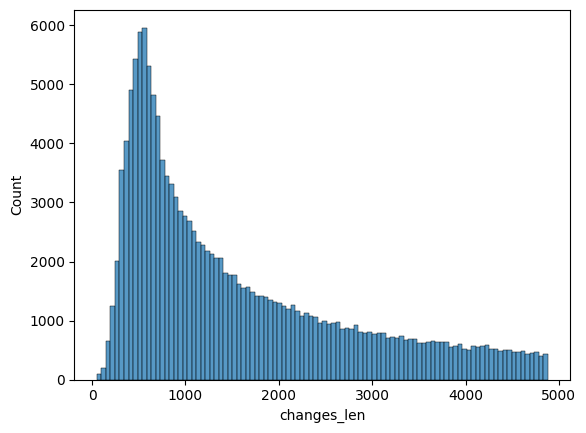

In [64]:
sns.histplot(grouped_data['changes_len'], bins=100)
plt.show()

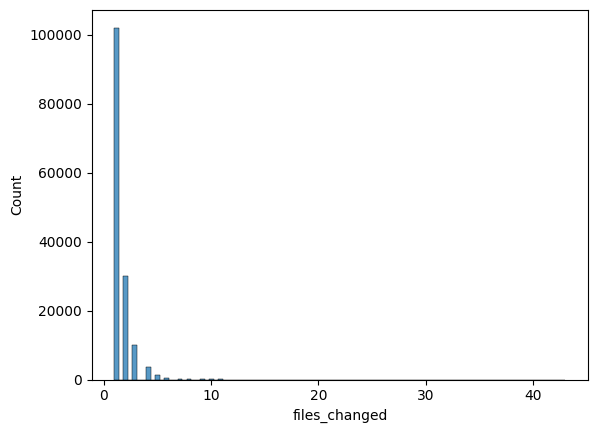

In [66]:
sns.histplot(grouped_data['files_changed'], bins=100)
plt.show()

In [67]:
grouped_data['files_changed'].max(), grouped_data['files_changed'].min(), grouped_data['files_changed'].mean()

(43, 1, 1.5018512534668929)

In [68]:
grouped_data.head()

,repo_name,commit_message,hash,commit_changes,files_changed,changes_len
0,3d-photo-inpainting,About 30% faster now\n,8769236a2a81ca776505f66733bc64a9b1c6d401,[ a/main.py b/main.py\nindex a6656b2..d4272bd ...,2,2120
3,3d-photo-inpainting,Add package time in main.py.\n,86ce0af5280f927b5a7967d8aa645f871ebc0387,[ a/main.py b/main.py\nindex e91085e..f779dbd ...,1,305
4,3d-photo-inpainting,Additional changes\n,fe521227a19fc38b9983485ff0d5e1038818abca,[ a/mesh.py b/mesh.py\nindex f29e723..1056511 ...,1,3646
6,3d-photo-inpainting,Edit mesh.py to accel.\n,4c7049d0a09268703774dfba70ab469af6cf2922,[ a/mesh.py b/mesh.py\nindex 702323b..725904d ...,1,530
7,3d-photo-inpainting,"Edit mesh_tools.py, mesh.py, utils.py to accel.\n",5917dcd828787ca4856f1a700c18788d67bdeccd,[ a/mesh_tools.py b/mesh_tools.py\nindex 0d363...,2,4804


In [69]:
# a = grouped_data[(grouped_data['repo_name'] == '30-seconds-of-python') & (
#             grouped_data['commit_message'] == 'Add excerpts where appropriate\n')]['commit_changes'].iloc[0]
# for e in a:
#     print(e)
#     print('-'*30)

In [74]:
grouped_data.shape

(148548, 6)

## Group samples with multiple files changed into 1 and add special tokens for training process

In [71]:
import pandas as pd
import numpy as np

data = pd.read_csv("../data/prepared/commits_cleaned_v4.csv", index_col=0)
data = data.dropna()

data["file_extension"] = data["files_changed"].apply(lambda x: x.split(".")[-1])
data = data[data["file_extension"] == "py"]

def group_data(dataframe):
    grouped_data = (
        dataframe.groupby(["repo_name", "commit_message", "hash"])
        .apply(lambda x: x["commit_changes"].tolist())
        .reset_index(name="commit_changes")
    )
    grouped_data["files_changed"] = grouped_data["commit_changes"].apply(
        lambda x: len(x)
    )
    grouped_data["changes_len"] = grouped_data["commit_changes"].apply(
        lambda x: sum(map(len, x))
    )
    changes_80_percentile = np.percentile(grouped_data["changes_len"], 80)
    grouped_data = grouped_data[grouped_data["changes_len"] < changes_80_percentile]
    return grouped_data

data = group_data(data)
def parse_file(file_changes):
    row_separated_file = file_changes.split("\n")
    # add filename token to the first line
    row_separated_file[0] = "<filename>" + row_separated_file[0] + "<filename>"

    #remove second line as it's an index of changes
    # row_separated_file = [row_separated_file[0]] + row_separated_file[2:] #brokes structure of addition/deletion files commits

    # add <code_add> token to the lines starting with +
    row_separated_file = [
        "<code_add>" + line + '<code_add>' if line.startswith("+") else line
        for line in row_separated_file
    ]

    # add <code_del> token to the lines starting with -
    row_separated_file = [
        "<code_del>" + line + '<code_del>' if line.startswith("-") else line
        for line in row_separated_file
    ]

    return "\n".join(row_separated_file)


def parse_files(files):
    return "\n\n\n".join([parse_file(file) for file in files]) + '<commit_msg>'


def add_tokens_to_message(message):
    return message + "<commit_msg>"

data['commit_changes'] = data['commit_changes'].apply(parse_files)
data['commit_message'] = data['commit_message'].apply(add_tokens_to_message)

In [72]:
data.shape

(148548, 6)

In [75]:
data.to_csv('../data/prepared/commits_cleaned_v5.csv')

## Dataset version with samples, containing only commits with single file changed

In [76]:
single_files_data = data[data['files_changed'] == 1]
single_files_data.shape

(102135, 6)

In [77]:
single_files_data.to_csv('../data/prepared/single_file_commits_v2.csv')